<a href="https://colab.research.google.com/github/xxcramseyxx/RNN/blob/main/rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the training set

In [ ]:
df = pd.read_csv('/content/Google_Stock_Price_Train.csv')
X = df.iloc[:, 1:2].values

In [ ]:
print(X)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(X)

In [ ]:
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


### Creating a data structure with 60 timesteps and 1 output aka 3 months


In [ ]:
X_train = []
y_train = []
for i in range(120, 1258):
  X_train.append(training_set_scaled[i-120:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) # X_train.shape[1]=timesteps,  last 1 is the predictor

In [ ]:
print(X_train)

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [ ]:
regressor = Sequential()


### Adding the first LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1],1))) #number of units(neurons),return sequences, input shape
regressor.add(Dropout(0.2)) #dropout arg = dropout rate

### Adding a second LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 72, return_sequences = True)) #number of units(neurons),return sequences
regressor.add(Dropout(0.2)) #dropout arg = dropout rate

### Adding a third LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 64, return_sequences = True)) #number of units(neurons),return sequences
regressor.add(Dropout(0.2)) #dropout arg = dropout rate

### Adding a fourth LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 32)) #number of units(neurons),return sequences = false (so remove)
regressor.add(Dropout(0.2)) #dropout arg = dropout rate

### Adding the output layer

In [ ]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [ ]:
regressor.compile(optimizer= 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [ ]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
36/36 [==============================] - 8s 221ms/step - loss: 0.0345
Epoch 2/100
36/36 [==============================] - 8s 231ms/step - loss: 0.0066
Epoch 3/100
36/36 [==============================] - 8s 218ms/step - loss: 0.0065
Epoch 4/100
36/36 [==============================] - 8s 218ms/step - loss: 0.0053
Epoch 5/100
36/36 [==============================] - 8s 217ms/step - loss: 0.0056
Epoch 6/100
36/36 [==============================] - 8s 218ms/step - loss: 0.0062
Epoch 7/100
36/36 [==============================] - 8s 218ms/step - loss: 0.0056
Epoch 8/100
36/36 [==============================] - 8s 220ms/step - loss: 0.0046
Epoch 9/100
36/36 [==============================] - 8s 219ms/step - loss: 0.0050
Epoch 10/100
36/36 [==============================] - 8s 218ms/step - loss: 0.0046
Epoch 11/100
36/36 [==============================] - 8s 220ms/step - loss: 0.0047
Epoch 12/100
36/36 [==============================] - 8s 221ms/step - loss: 0.0041
Epoch 13/100


## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [ ]:
df_test = pd.read_csv('/content/Google_Stock_Price_Test.csv')
y = df_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [ ]:
df_total = pd.concat((df['Open'],df_test['Open']), axis = 0)
inputs = df_total[len(df)- len(df_test)- 120: ].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(120, 140):
  X_test.append(inputs[i-120:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1)) # X_train.shape[1]=timesteps,  last 1 is the predictor
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
print(predicted_stock_price)

[[762.5002 ]
 [757.9234 ]
 [754.32245]
 [754.41205]
 [756.42126]
 [760.52344]
 [766.2304 ]
 [772.22363]
 [778.2284 ]
 [783.3555 ]
 [786.54083]
 [788.31287]
 [787.21735]
 [785.91077]
 [785.36975]
 [785.06116]
 [784.7173 ]
 [784.5138 ]
 [785.17206]
 [784.49066]]


### Visualising the results

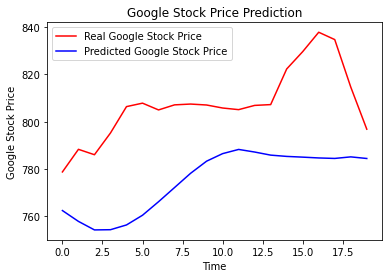

In [ ]:
plt.plot(y, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()